# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.137269e+01     7.188314e+00
 * time: 0.005658149719238281
     1     2.744778e+01     6.246268e+00
 * time: 0.01613593101501465
     2     2.056957e+01     8.580864e+00
 * time: 0.042675018310546875
     3     1.360194e+01     2.922748e+00
 * time: 0.07401514053344727
     4     1.099272e+01     1.854350e+00
 * time: 0.09996294975280762
     5     1.081691e+01     2.136928e+00
 * time: 0.11917614936828613
     6     1.004562e+01     1.951481e+00
 * time: 0.13940000534057617
     7     9.339694e+00     1.803521e+00
 * time: 0.16016411781311035
     8     9.078749e+00     9.933888e-01
 * time: 0.18290495872497559
     9     8.992311e+00     1.095070e+00
 * time: 0.1994309425354004
    10     8.934697e+00     1.563734e+00
 * time: 0.21541213989257812
    11     8.895962e+00     9.237345e-01
 * time: 0.23191499710083008
    12     8.768984e+00     5.312141e-01
 * time: 0.2476060390472412
    13     8.676156e+00     4.053219e-01
 * time:

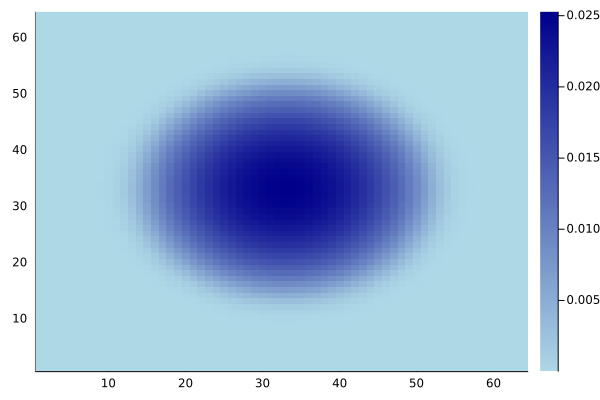

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)